# Predicting the survival of titanic passengers

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split

**Importing algorithms**

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

**Getting data**

In [3]:
path = 'C:/Users/JUDE-GATES/Desktop/zullajude/train (2).csv'
data= pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data cleaning**

In [4]:
data.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


As we can see that 38% of the passengers survived in our dataset.Mean age of cutomers was 29 years

**Dealing with missing values**

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Imputing missing values for Age and Embarked variables by using mean and mode

In [7]:
data['Age']= data['Age'].fillna(data['Age'].mean())
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode().iloc[0])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Exploratory data analysis:

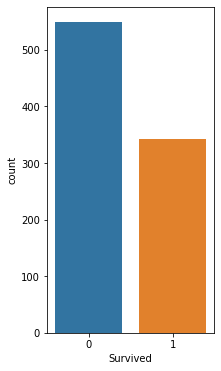

In [8]:
plt.figure(figsize=(3,6))
sns.countplot(x='Survived', data=data)

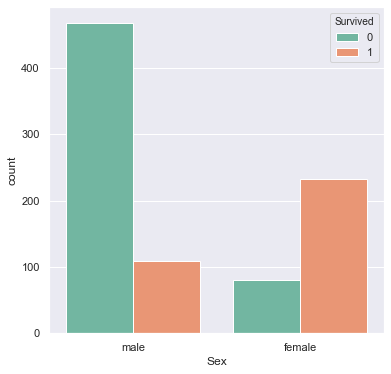

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='Sex',
              hue='Survived',
              data=data,
             palette='Set2')
plt.show()

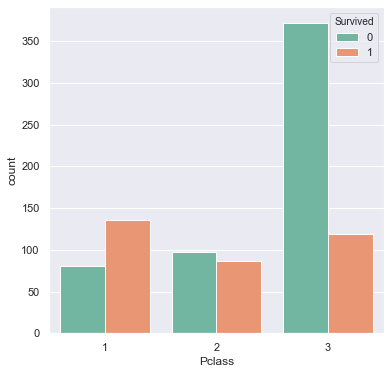

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='Pclass',
              hue='Survived',
              data=data,
             palette='Set2')
plt.show()

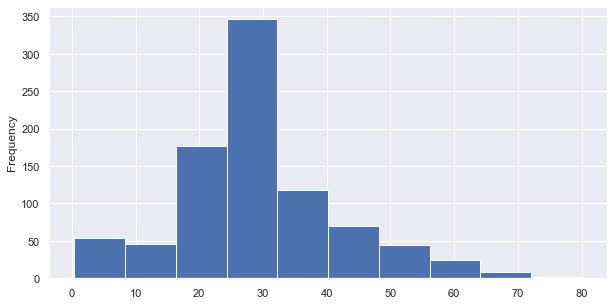

In [11]:
data['Age'].plot.hist(figsize=(10,5))

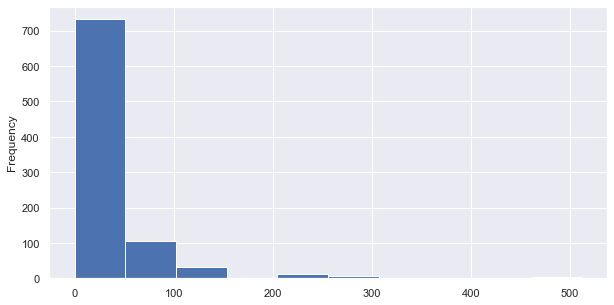

In [12]:
data['Fare'].plot.hist(bins=10, figsize=(10,5))

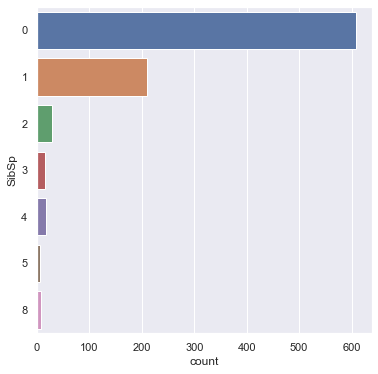

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(y='SibSp',data=data)

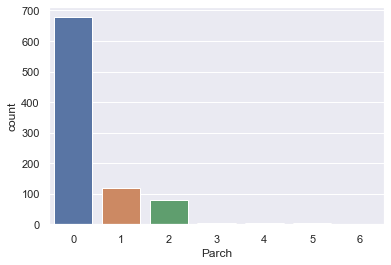

In [14]:
sns.countplot(x='Parch',data=data)

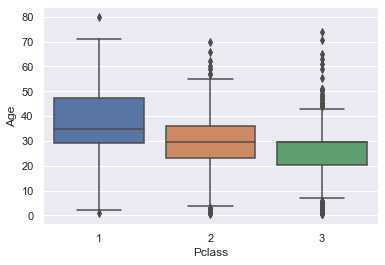

In [15]:
sns.boxplot(x='Pclass', y='Age', data=data)

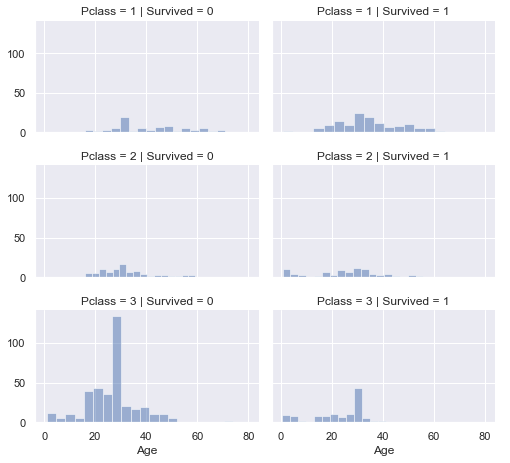

In [16]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


**One hot encoding**

We have Sex, Ticket and Embarked as categorical features which we need to convert to numeric so the our algorithms could process the data

In [18]:
dummy= pd.get_dummies(data['Sex'])
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [19]:
df=pd.concat([data,dummy], axis=1)

**Another way converting categorical features into numerical**

In [20]:
ports = {"S": 0, "C": 1, "Q": 2}
data=[df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,1,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,4,1,1,female,35.0,1,0,113803,53.1000,0,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,0,0,1


Leaving Ticket out of the data. This another form of dropping a feature from the dataset

In [22]:
cols_of_inerest= ['PassengerId','Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare','female','male','Embarked']
df = df[cols_of_inerest]
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked
0,1,0,3,22.0,1,0,7.2500,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,1
2,3,1,3,26.0,0,0,7.9250,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0
4,5,0,3,35.0,0,0,8.0500,0,1,0


**Standardising the data for normal distribution**

Both age and fare seem out of scale with respect to other features, hence this could end up data skewness. In order to normalise the data distribution, we will introduce catergories to ensure a normal distribution

In [23]:
data = [df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [24]:
data = [df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked
0,1,0,3,2,1,0,0,0,1,0
1,2,1,1,5,1,0,3,1,0,1
2,3,1,3,3,0,0,1,1,0,0
3,4,1,1,5,1,0,3,1,0,0
4,5,0,3,5,0,0,1,0,1,0


**Feature engineering**

Here we are going to create more features through manipulating existing features.

The first variable Age_Class is important in the sense that with age, people tend to make more money hence they are likely to spend more money and to buy a ticket on higher class.

Another features include relatives and not_alone. Relatives represent the no. of relatives boarded along wtih the passenger and not_alone is an indicator if there are 1 or more relatives then no_alone will be 0 and vice versa.

In [25]:
data = [df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [26]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked,Age_Class,relatives,not_alone
0,1,0,3,2,1,0,0,0,1,0,6,1,0
1,2,1,1,5,1,0,3,1,0,1,5,1,0
2,3,1,3,3,0,0,1,1,0,0,9,0,1
3,4,1,1,5,1,0,3,1,0,0,5,1,0
4,5,0,3,5,0,0,1,0,1,0,15,0,1


Fare_Per_Person will show the fare paid by all the relatives including the the passengers.

+1 in the third row represents the addition of passenger to the the relatives

In [27]:
data = [df]
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked,Age_Class,relatives,not_alone,Fare_Per_Person
0,1,0,3,2,1,0,0,0,1,0,6,1,0,0
1,2,1,1,5,1,0,3,1,0,1,5,1,0,1
2,3,1,3,3,0,0,1,1,0,0,9,0,1,1
3,4,1,1,5,1,0,3,1,0,0,5,1,0,1
4,5,0,3,5,0,0,1,0,1,0,15,0,1,1


**Preparing for modelling**

In [30]:
df.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Age                int32
SibSp              int64
Parch              int64
Fare               int32
female             uint8
male               uint8
Embarked           int64
Age_Class          int64
relatives          int64
not_alone          int32
Fare_Per_Person    int32
dtype: object

**Splitting data into training and test datasets**

Setting random_state to 200 means that each time when we run the below code, the values in our both training and test dataset would remain same. If we don't mention the random_state in the code then it will produce different results each time when we run the code

In [31]:
train= df.sample(frac=0.8, random_state=200)
test= df.drop(train.index)
print(train.shape)
print(test.shape)

(713, 14)
(178, 14)


We are going to drop PassengerId from training data as this feature doesn't show any trend and thus is classified as noise. This would als help us to avoid model overfitting. We are going to drop Survived from test data as that's what our model will predict from the test data

In [32]:
train_df= train.drop('PassengerId', axis=1)
test_df = test.drop('Survived', axis=1)
print(train_df.shape)
print(test_df.shape)

(713, 13)
(178, 13)


In [33]:
X_train= train_df.drop('Survived', axis=1)
y_train= train_df['Survived']
X_test= test_df.drop('PassengerId', axis=1).copy()
print(X_train.shape)
print(X_test.shape)

(713, 12)
(178, 12)


# Building machine learning models
**stochastic gradient descent (SGD) learning**

SGG classifier implements linear models with Stochastic Gradiant descent which considers only 1 random point while changing weights unlike gradiant descent which considers the whole training data. 

In [34]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

77.84 %


**Random Forest**

In [35]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

91.3 %


**Logistic Regression**

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.21 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**K nearest neighbours (KNN)**

KNN uses the data in the which the data points are separated into various classes to predict the classification of a new sample point. The new sample point will be partnered with a particular class based on its proximity to the the class.

A few Applications and Examples of KNN
•Credit ratings — collecting financial characteristics vs. comparing people with similar financial features to a database. By the very nature of a credit rating, people who have similar financial details would be given similar credit ratings. Therefore, they would like to be able to use this existing database to predict a new customer’s credit rating, without having to perform all the calculations.
•Should the bank give a loan to an individual? Would an individual default on his or her loan? Is that person closer in characteristics to people who defaulted or did not default on their loans?
•In political science — classing a potential voter to a “will vote” or “will not vote”, or to “vote Democrat” or “vote Republican”.
•More advance examples could include handwriting detection (like OCR), image recognition and even video recognition.


In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

86.82 %


**Gaussian Naive Bayes**

In [38]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

78.4 %


**Perceptron**

In [39]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

41.09 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


**Linear SVC**

In [40]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

80.5 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Decision Tree**

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

91.3 %


# Model comparison

In [42]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.30,Random Forest
91.30,Decision Tree
86.82,KNN
81.21,Logistic Regression
80.50,Support Vector Machines
78.40,Naive Bayes
77.84,Stochastic Gradient Decent
41.09,Perceptron


**K-Fold cross validation**

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.


In [43]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

In [44]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75       0.84722222 0.76388889 0.79166667 0.88732394 0.84507042
 0.84507042 0.87323944 0.87323944 0.78571429]
Mean: 0.8262435725463895
Standard Deviation: 0.0467294478448409


This looks much more realistic than before as our model has a mean accuracy of 80% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 4%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

**What is Random Forest?**

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

**Feature importance**

Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [45]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [46]:
importances.head(15)

,importance
feature,
female,0.190
male,0.160
Age_Class,0.119
Pclass,0.102
Age,0.085
Fare,0.082
Embarked,0.075
relatives,0.057
Fare_Per_Person,0.049


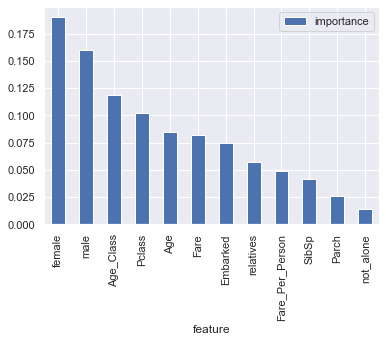

In [47]:
importances.plot.bar()

**Findings**
* **Sex** and **Pclass** along with **relatives** and **port** play a key role in our random forest classfier's prediction process

* For the same reason, features with less importance could be dropped from the datast and train the model again for a better accuracy

In [48]:
df.drop('not_alone', axis=1, inplace=True)

In [49]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

91.3 %


Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

# Further evaluation

[[394  45]
 [ 78 196]]


Text(48.5, 0.5, 'Actual classes')

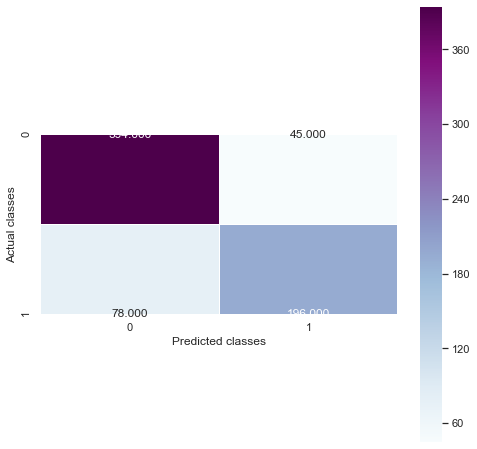

In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
sns.set(rc={'figure.figsize':(8,8)})
cfm=confusion_matrix(y_train, predictions)
sns.heatmap(cfm, annot=True,fmt=".3f", linewidths=.5, square = True, cmap = 'BuPu')
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Explanation**

* First row is about predictions of not survived. Our model predicts 393 passengers accurate that they didn't survive (called true negative) while inaccurately predicts 48 passengers survived while actually they didn't survive (false negative)

* Second row is about predictions of survived passengers. Our model predicts 87 passengers not survived while actually they survived (false positive) while accurately predicts 184 passengers as survived(true positive)

**ROC AUC Curve**

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [51]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

NameError: name 'y_scores' is not defined

In [ ]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

**ROC AUC Score**

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

**Submission**

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_prediction
    })
submission.to_csv('submission.csv', index=False)